In [22]:
import bdpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import product

In [2]:
sns.set_style("whitegrid")

In [3]:
# config
subjects = {
    "Subject1": ["data/gh/Subject1.h5"],
}

rois = {
    "VC": "ROI_VC = 1",
    "LVC": "ROI_LVC = 1",
    "HVC": "ROI_HVC = 1",
    "V1": "ROI_V1 = 1",
    "V2": "ROI_V2 = 1",
    "V3": "ROI_V3 = 1",
    "V4": "ROI_V4 = 1",
    "LOC": "ROI_LOC = 1",
    "FFA": "ROI_FFA = 1",
    "PPA": "ROI_PPA = 1",
}

In [4]:
# load data
data_all = {}
for sbj in subjects:
    if len(subjects[sbj]) == 1:
        data_all[sbj] = bdpy.BData(subjects[sbj][0])
    else:
        # Concatenate data
        suc_cols = ["Run", "Block"]
        data_all[sbj] = concat_dataset(
            [bdpy.BData(f) for f in subjects[sbj]], 
            successive=suc_cols
        )

In [5]:
# analyze first ROI of subject 1
sbj = list(subjects.keys())[0]
roi = list(rois.keys())[0]

In [6]:
dat = data_all[sbj]

In [7]:
x = dat.select(rois[roi])
datatype = dat.select("DataType")
labels = dat.select("stimulus_id")

In [8]:
x.shape

(3450, 4466)

In [9]:
datatype.shape

(3450, 1)

In [10]:
labels.shape

(3450, 1)

In [11]:
# Get training and test dataset
i_train = (datatype == 1).flatten()    # Index for training
i_test_pt = (datatype == 2).flatten()  # Index for perception test
i_test_im = (datatype == 3).flatten()  # Index for imagery test
i_test = i_test_pt + i_test_im

In [12]:
x_train = x[i_train, :]
x_test = x[i_test, :]

In [13]:
x_train.shape

(1200, 4466)

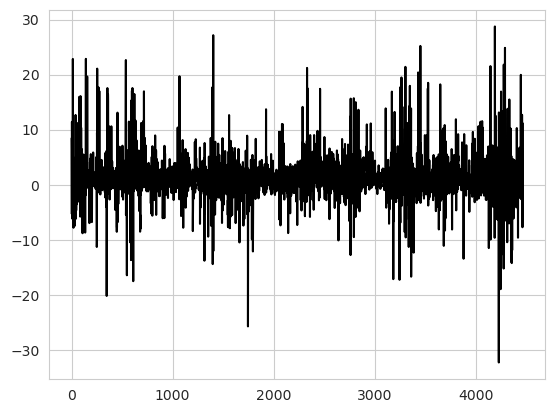

In [14]:
plt.plot(x_train[0], "k")
plt.show()